In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class LatLong2Grid:
    def __init__(self):
        self.min_lat = 22.502
        self.max_lat = 22.688
        self.min_long = 113.813
        self.max_long = 114.293
        self.max_grid_long = 480
        self.max_grid_lat = 187
    
    def process_df(self, df):
        df['time'] = pd.to_datetime(df["time"])
        df.sort_values(by="time")
        df['longitude'] = df['longitude'].round(3)
        df['latitude'] = df['latitude'].round(3)
        s1 = ((df['longitude']<=self.max_long)&(df['longitude']>=self.min_long))
        s2 = ((df['latitude']<=self.max_lat)&(df['latitude']>=self.min_lat))
        slice_ = s1 & s2 
        df = df[slice_]
        df['long'] = df['longitude'].apply(lambda x: int(
            self.max_grid_long*((x-self.min_long)/(self.max_long - self.min_long)))
                                          )
        df['lat'] = df['latitude'].apply(lambda x: int(
            self.max_grid_lat*((x-self.min_lat)/(self.max_lat - self.min_lat)))
                                        )
        return df
    
    def plot_grid(self, df):
        df = self.process_df(df)
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        axes = axes.ravel()
        for i, ax in enumerate(axes):
            indicies = []
            temp_df = df[(df['plate'] == i) & (df['status'] == 1)]
            ax.scatter(temp_df['long'], temp_df['lat'], s=1)
            ax.set_xticks([0, 100, 200, 300, 400])
            ax.set_yticks([0, 50, 100, 150, 200])
            ax.set_xlim([0, 500])
            ax.set_ylim([0, 200])
    
    def image_show(self, df):
        df = self.process_df(df)
        color = [(255, 255, 255), (0, 255, 255)]
        thickness = 2
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        axes = axes.ravel()
        for i in range(5):
            image = np.ones((self.max_grid_lat, self.max_grid_long, 3), np.uint8)
            for st in range(2):
                temp_df = df[(df['plate'] == i) & (df['status'] == st)]
                for j in range(temp_df.shape[0]-1):
                    x1, y1 = temp_df.iloc[j].long, self.max_grid_lat - temp_df.iloc[j].lat
                    x2, y2 = temp_df.iloc[j].long, self.max_grid_lat - temp_df.iloc[j].lat
                    image = cv2.line(image, (x1, y1), (x2, y2), color[st], thickness)
            axes[i].imshow(image, interpolation='nearest', aspect='auto')

In [3]:
data_dir = "../data/data_5drivers/"
all_csv_names = os.listdir(data_dir)
print(len(all_csv_names))

179


In [4]:
lat_long_to_grid = LatLong2Grid()

/tmp/ipykernel_68588/1853832319.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long'] = df['longitude'].apply(lambda x: int(
/tmp/ipykernel_68588/1853832319.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = df['latitude'].apply(lambda x: int(
/tmp/ipykernel_68588/1853832319.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

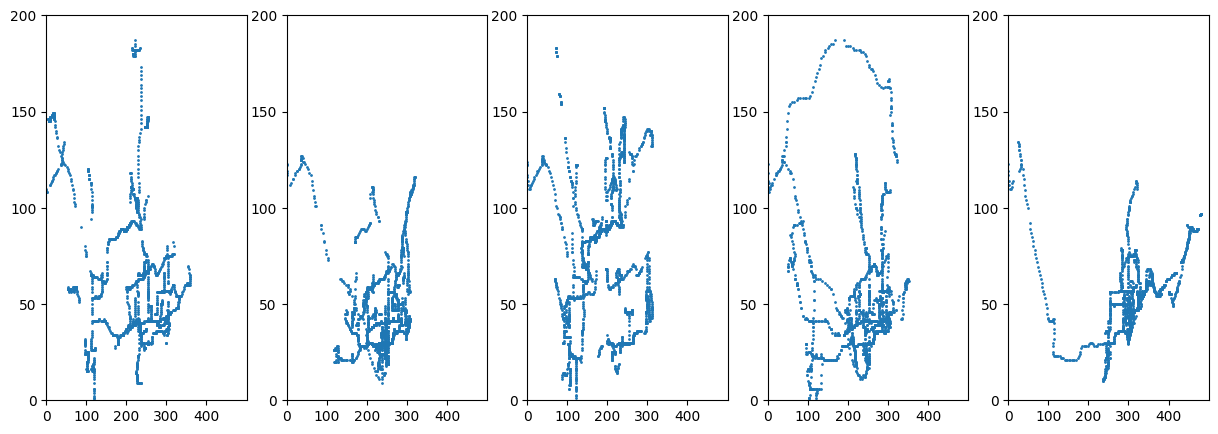

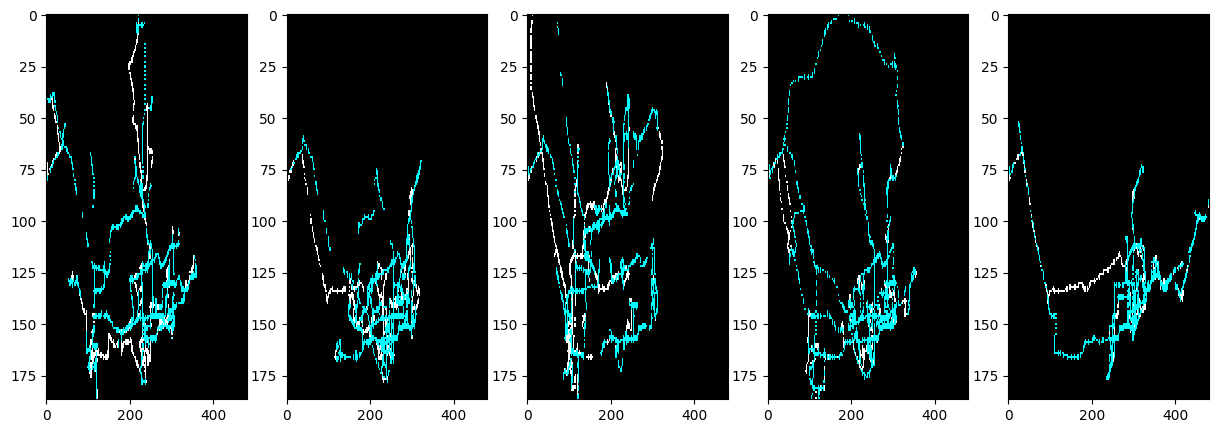

In [5]:
id_ = 5
df = pd.read_csv(os.path.join(data_dir, all_csv_names[id_]))
lat_long_to_grid.plot_grid(df)
lat_long_to_grid.image_show(df)
plt.show()

/tmp/ipykernel_68588/1853832319.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['long'] = df['longitude'].apply(lambda x: int(
/tmp/ipykernel_68588/1853832319.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lat'] = df['latitude'].apply(lambda x: int(
/tmp/ipykernel_68588/1853832319.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

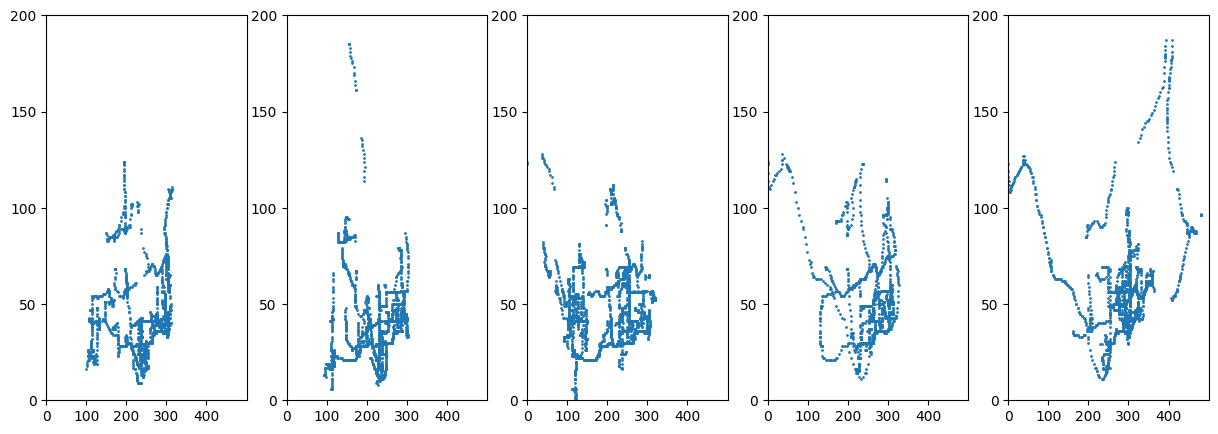

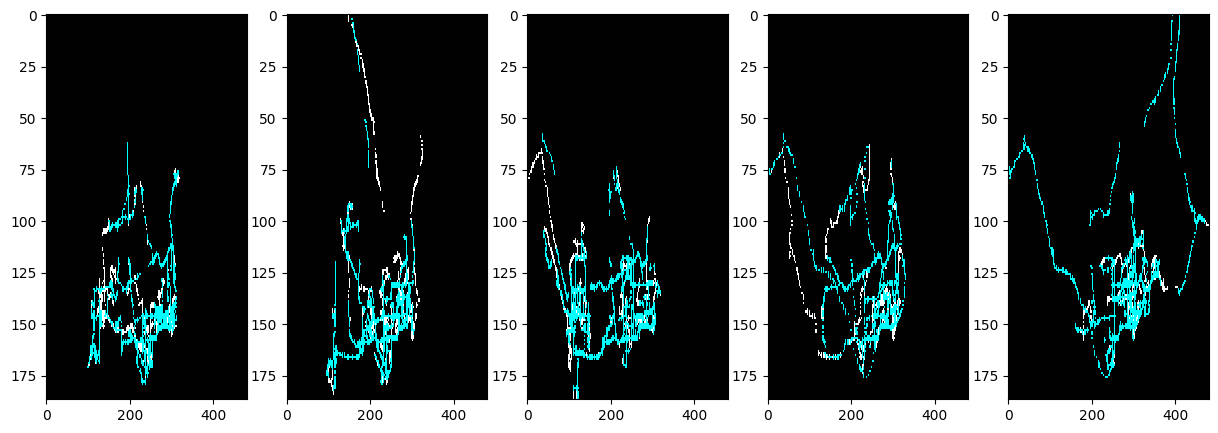

In [6]:
id_ = 111
df = pd.read_csv(os.path.join(data_dir, all_csv_names[id_]))
lat_long_to_grid.plot_grid(df)
lat_long_to_grid.image_show(df)
plt.show()